<a href="https://colab.research.google.com/github/MillenRodrigues/MineracaoEAnaliseDeDados/blob/main/BIG_A5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


Millen Tavares Rodrigues

Tia: 92300073

Disponível em [github](https://github.com/MillenRodrigues/MineracaoEAnaliseDeDados/blob/main/BIG_A5_Clustering.ipynb)

# **Tarefa de Aprofundamento 5**
## CASO: Clustering, Segmentando Países pela Força de Trabalho
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho.

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**.

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979.

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [2]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [3]:
# resposta
df.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


In [4]:
df.Country

0            Belgium
1            Denmark
2             France
3         W. Germany
4            Ireland
5              Italy
6         Luxembourg
7        Netherlands
8     United Kingdom
9            Austria
10           Finland
11            Greece
12            Norway
13          Portugal
14             Spain
15            Sweden
16       Switzerland
17            Turkey
18          Bulgaria
19    Czechoslovakia
20        E. Germany
21           Hungary
22            Poland
23           Rumania
24              USSR
25        Yugoslavia
Name: Country, dtype: object

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [5]:
# resposta
from sklearn.preprocessing import StandardScaler
# resposta
df_norm = df.drop(['Country'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(df_norm)

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



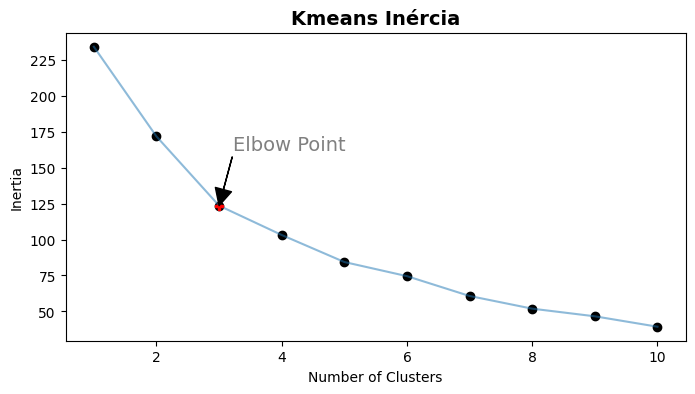

In [6]:
# resposta
from sklearn.cluster import KMeans
#oculta warnings do kmeans
import warnings
warnings.filterwarnings("ignore")

# função disponível no eBook
def inercia(X=X, kmin=1, kmax=10):
    inertia = []
    for n in range(kmin, kmax+1):
        clf = KMeans(n_clusters = n, random_state= 1234)
        clf.fit(X)
        inertia.append(clf.inertia_)
    plt.figure(figsize = (8, 4))
    plt.plot(np.arange(1, 11), inertia, 'ko')
    plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.title('Kmeans Inércia', fontsize=14, weight='bold')
    return inertia
inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3, inertia[2], 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3, inertia[2]),
             xytext=(10, 40), fontsize=14,
             textcoords="offset points",
             color='grey', arrowprops=dict(facecolor='black',width=0.1))
plt.show()


In [7]:
# resposta
warnings.filterwarnings("ignore") #oculta wanings do kmeans
# função disponível no eBook

from sklearn import metrics
for n_clusters in range(2,11):
    clf = KMeans (n_clusters = n_clusters, random_state= 1234)
    clf.fit(X)
    labels = clf.labels_
    print('Silhueta média para', n_clusters, 'clusters: ', np.round(metrics.silhouette_score (X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


R: O método do cotovelo sugere 3 clusters, mas a silhueta sugere 2 clusters.

(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados.

In [8]:
# resposta

import scipy.cluster.hierarchy as sch
for method in ('ward','complete','single'):
    print(f'Esquema de ligação: {method}')
    for n_clusters in range(2,10):
        labels = sch.fcluster(sch.linkage(X, method=method), n_clusters, 'maxclust' )
        silueta = np.round(metrics.silhouette_score(X, labels, metric='euclidean'),3)
        print('Silhueta média para', n_clusters, 'clusters: ', silueta)


Esquema de ligação: ward
Silhueta média para 2 clusters:  0.456
Silhueta média para 3 clusters:  0.244
Silhueta média para 4 clusters:  0.251
Silhueta média para 5 clusters:  0.242
Silhueta média para 6 clusters:  0.179
Silhueta média para 7 clusters:  0.187
Silhueta média para 8 clusters:  0.175
Silhueta média para 9 clusters:  0.18
Esquema de ligação: complete
Silhueta média para 2 clusters:  0.456
Silhueta média para 3 clusters:  0.227
Silhueta média para 4 clusters:  0.206
Silhueta média para 5 clusters:  0.193
Silhueta média para 6 clusters:  0.207
Silhueta média para 7 clusters:  0.187
Silhueta média para 8 clusters:  0.174
Silhueta média para 9 clusters:  0.161
Esquema de ligação: single
Silhueta média para 2 clusters:  0.461
Silhueta média para 3 clusters:  0.388
Silhueta média para 4 clusters:  0.134
Silhueta média para 5 clusters:  0.211
Silhueta média para 6 clusters:  0.128
Silhueta média para 7 clusters:  0.101
Silhueta média para 8 clusters:  0.086
Silhueta média para 9 c

R:

| Metodo   | Valor |
|----------|-------|
| ward     | 0.456 |
| complete | 0.456 |
| single   | 0.461 |

## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*.

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



In [9]:
# resposta
labels = sch.fcluster(sch.linkage(X, method=method), 2, 'maxclust' )
pd.Series(labels).value_counts()

1    25
2     1
dtype: int64

In [10]:
# resposta
labels = sch.fcluster(sch.linkage(X, method=method), 3, 'maxclust' )
pd.Series(labels).value_counts()

1    24
3     1
2     1
dtype: int64

R: tanto para 2 quante 3 clustes a distribuição não parece adequada

## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele?

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [11]:
# Resposta
clf = KMeans (n_clusters = 3, random_state= 1234)
clf.fit(X)
labels = clf.labels_
pd.Series(labels).value_counts()

1    16
2     7
0     3
dtype: int64

R: a distribuição está mais adequada

In [12]:
# Resposta
df['Cluster'] = labels
cluster_names = df.groupby('Cluster').Country.agg([('Paises', ','.join)])
cluster_names

,Paises
Cluster,
0,"Greece,Turkey,Yugoslavia"
1,"Belgium,Denmark,France,W. Germany,Ireland,Ital..."
2,"Bulgaria,Czechoslovakia,E. Germany,Hungary,Pol..."


In [13]:
# Resposta
medias = df.drop(['Country'], axis=1).groupby('Cluster').agg([('media', 'mean')])
medias.join(cluster_names)

,"(Agr, media)","(Min, media)","(Man, media)","(PS, media)","(Con, media)","(SI, media)","(Fin, media)","(SPS, media)","(TC, media)",Paises
Cluster,,,,,,,,,,
0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333,"Greece,Turkey,Yugoslavia"
1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500,"Belgium,Denmark,France,W. Germany,Ireland,Ital..."
2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571,"Bulgaria,Czechoslovakia,E. Germany,Hungary,Pol..."


R:

(Q4): 52.3; Greece,Turkey,Yugoslavia

(Q5): Os percentuais da população empregada em Serviços